<a href="https://colab.research.google.com/github/Jai-9906/smart-resume-analyzer1/blob/main/Smart_Resume_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyMuPDF python-docx spacy scikit-learn matplotlib tqdm
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 115.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import fitz  # PyMuPDF
import docx
import spacy
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

nlp = spacy.load("en_core_web_sm")


In [4]:
def extract_text_from_pdf(pdf_path):
    text = ""
    with fitz.open(pdf_path) as doc:
        for page in doc:
            text += page.get_text()
    return text

def extract_text_from_docx(docx_path):
    doc = docx.Document(docx_path)
    return "\n".join([p.text for p in doc.paragraphs])


In [5]:
def extract_resume_sections(text):
    text = text.lower()
    skills = re.findall(r"(python|java|sql|ml|ai|deep learning|tensorflow|pandas|numpy|cloud|docker|linux|flask|fastapi)", text)
    education = re.findall(r"(b\.?tech|bachelor|master|phd|university|college|degree)", text)
    experience = re.findall(r"(\d+\+?\s+years|intern|developer|engineer|analyst)", text)
    return list(set(skills)), list(set(education)), list(set(experience))


In [6]:
def compare_resume_job(resume_text, job_desc):
    vectorizer = TfidfVectorizer().fit_transform([resume_text, job_desc])
    similarity = cosine_similarity(vectorizer)[0][1]

    resume_skills, resume_edu, resume_exp = extract_resume_sections(resume_text)
    jd_skills, jd_edu, jd_exp = extract_resume_sections(job_desc.lower())

    def match_percent(resume_list, jd_list):
        if not jd_list: return 0
        matches = len(set(resume_list) & set(jd_list))
        return int((matches / len(set(jd_list))) * 100)

    return {
        "overall_match": round(similarity * 100, 2),
        "skills_match": match_percent(resume_skills, jd_skills),
        "education_match": match_percent(resume_edu, jd_edu),
        "experience_match": match_percent(resume_exp, jd_exp)
    }


In [7]:
def visualize_scores(scores):
    labels = ['Overall', 'Skills', 'Education', 'Experience']
    values = [scores['overall_match'], scores['skills_match'], scores['education_match'], scores['experience_match']]

    plt.figure(figsize=(7,4))
    plt.bar(labels, values, color=['#4C72B0','#55A868','#C44E52','#8172B3'])
    plt.title("Resume vs Job Description Match Score")
    plt.ylabel("Percentage Match")
    plt.ylim(0, 100)
    plt.show()


Saving Hitesh_Resume_Cybersecurity.pdf to Hitesh_Resume_Cybersecurity.pdf
Enter job description: DLP Engineer

📊 Match Report: {'overall_match': np.float64(14.38), 'skills_match': 0, 'education_match': 0, 'experience_match': 100}


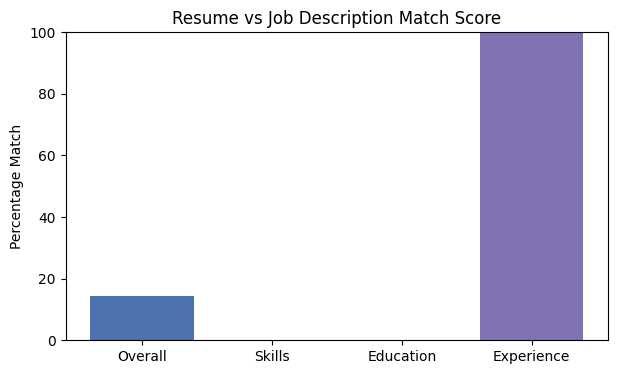

In [8]:
from google.colab import files

uploaded = files.upload()
resume_path = list(uploaded.keys())[0]
job_description = input("Enter job description: ")

if resume_path.endswith(".pdf"):
    resume_text = extract_text_from_pdf(resume_path)
else:
    resume_text = extract_text_from_docx(resume_path)

scores = compare_resume_job(resume_text, job_description)
print("\n📊 Match Report:", scores)
visualize_scores(scores)
